# Opinion Mining-British Airways

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chene\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Functions to use

In [2]:
def sentence(List):
    ch=''
    for i in range(0,len(List)):
        ch=List[i]+ch
    return(ch)
        

In [3]:
def count(List):
    pos=0
    for i in range(0,len(train)):
        if('pos' in train[i]):
            pos=pos+1
    return(pos)

# I-Libraries Importing

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix

# II- Data Scraping: Reviwes,Rating,Publish_Year

In [5]:
reviews=[]
Rating=[]
publish_year=[]

In [6]:
base_url='''https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'''
for i in range(2,39):
    page=requests.get(base_url)
    soup=BeautifulSoup(page.content)
    List=soup.find('div',id='container').find_all('article',itemprop="review")
    for elem in List:
        if(elem.find('span',itemprop="ratingValue")!=None):
            z=elem.find('h2',class_="text_header").text.split('h2')[-1]
            if(z!='British Airways customer review'):
                x=elem.find('span',itemprop="ratingValue").text.split('span')[-1]
                Rating.append(int(x))
                y=str(elem.find('time'))
                y=y.split('datetime=')[-1].split('"')[1]
                date_=datetime.strptime(y, '%Y-%m-%d').date()
                publish_year.append(date_.year)
                reviews.append(z)
    base_url=f'''https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100'''
        

In [7]:
reviews=pd.Series(reviews)
Rating=pd.Series(Rating)
publish_year=pd.Series(publish_year)

In [8]:
df=pd.DataFrame(columns=['reviews','Rating','publish_year'])
df['reviews']=reviews
df['Rating']=Rating
df['publish_year']=publish_year

In [9]:
df

,reviews,Rating,publish_year
0,"""Excellent service""",9,2023
1,"""Sound dinner service""",9,2023
2,"""A really excellent journey""",9,2023
3,"""flight was one of the worst""",2,2023
4,"""there is a race to the bottom""",3,2023
...,...,...,...
2503,"""need to up their game""",3,2015
2504,"""our last flight with British Airways""",1,2015
2505,"""supposed legacy airline""",2,2015
2506,"""staff amiable and present""",7,2015


# III-Data Analysis

### 1-Mean value

In [10]:
df['Rating'].mean() # below average

4.48006379585327

> The mean score of the total ratings is 4.47 which is below average 

### 2-Reviews Compared to the Rating

In [11]:
df_rating_count = df.groupby('Rating').count()

In [12]:
col_map = plt.get_cmap('Paired')

Text(0.5, 1.0, 'The reviews compared to the Rating')

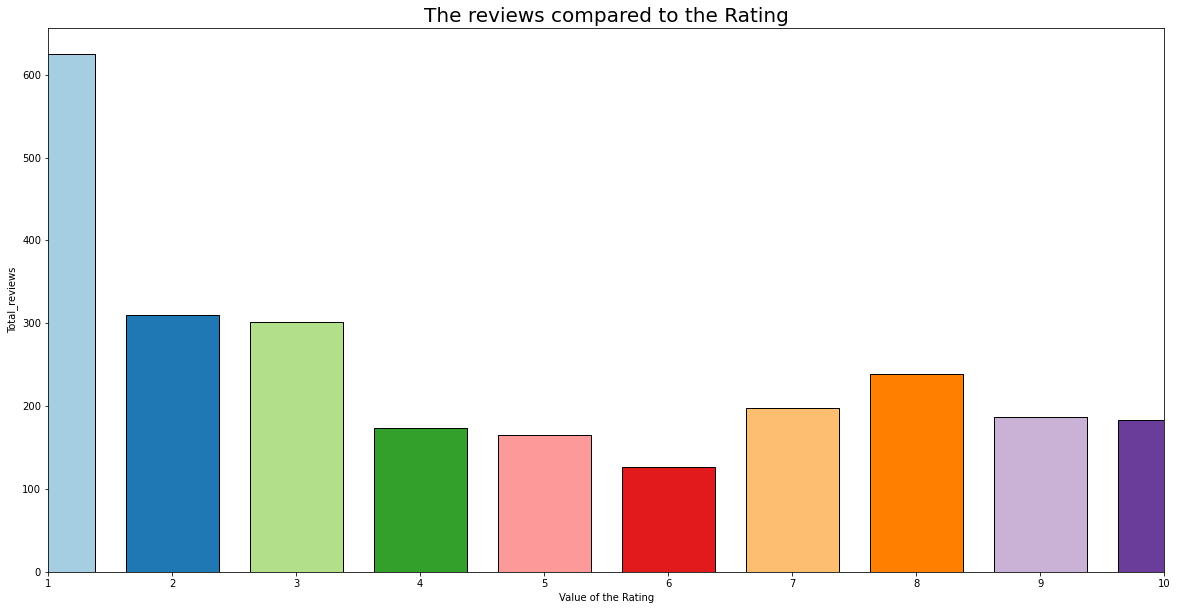

In [13]:
plt.figure(figsize=(20,10))
plt.bar(df_rating_count.index,df_rating_count['reviews'],width=0.75, color=col_map.colors, edgecolor='k')
plt.xlim(1,10)
plt.xlabel('Value of the Rating')
plt.ylabel('Total_reviews')
plt.title('The reviews compared to the Rating',fontsize=20 )

### 3-Evolution of the rating over the years Chart

Text(0.5, 1.0, 'Evolution of the rating over the Years')

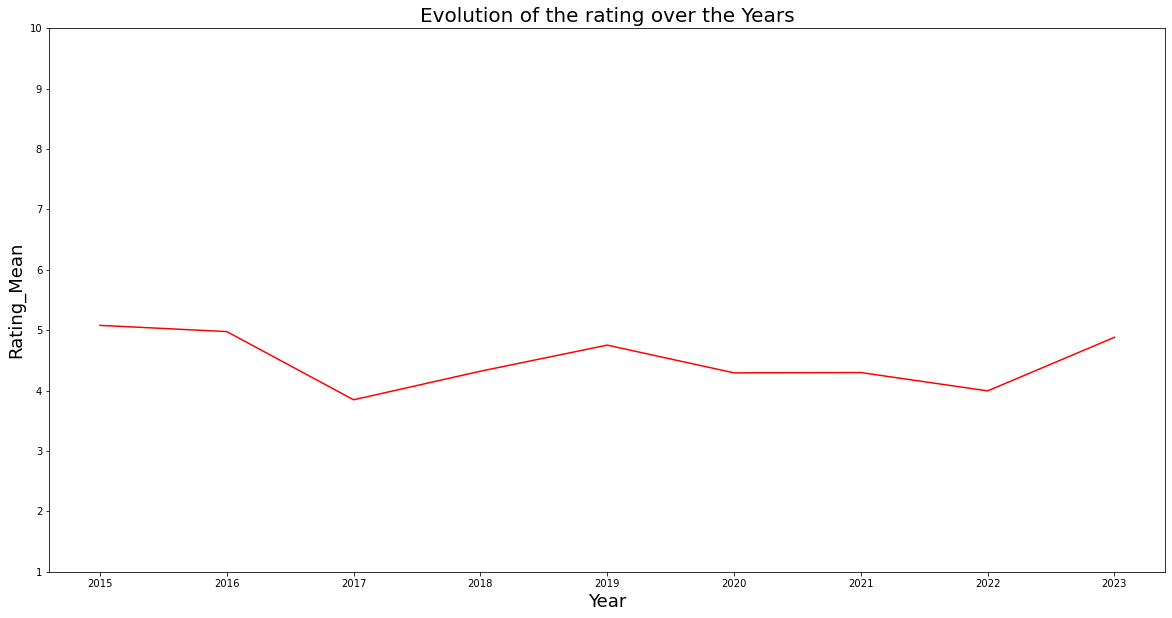

In [14]:
df_year=df.groupby('publish_year').mean()
plt.figure(figsize=(20,10))
axes = pyplot.gca() 
plt.plot(df_year.index,df_year['Rating'],c='r')
plt.xlabel("Year",fontsize=18)
plt.ylabel("Rating_Mean",fontsize=18)
plt.ylim(1,10)
plt.title('Evolution of the rating over the Years', fontsize=20 )

>>There is no great change in the reviews over the years, they are approximately in the same range. 

# IV- Sentiment analysis:Static Explanation

### 1-Frequent words: WordCloud

In [15]:
content_review=''
for i in range(0,len(df['reviews'])):
    content_review=reviews[i]+''+content_review

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
from PIL import Image

In [18]:
STOPWORDS_extra=['a','British Airways','seats','flight','BA','staff','service','food','crew','experience','Seat','airline','cabin','crew' 'about','British','Airways','above','after', 'again', 'against', 'all', 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because','been','before','being','below','between','both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever', 'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'hence', 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'therefore', 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",'www','you',"you'd","you'll","you're", "you've",'your','yours','yourself','yourselves','not','really','another','will','customer']

In [19]:
mask=np.array(Image.open('Downloads/plane_5.jpg'))

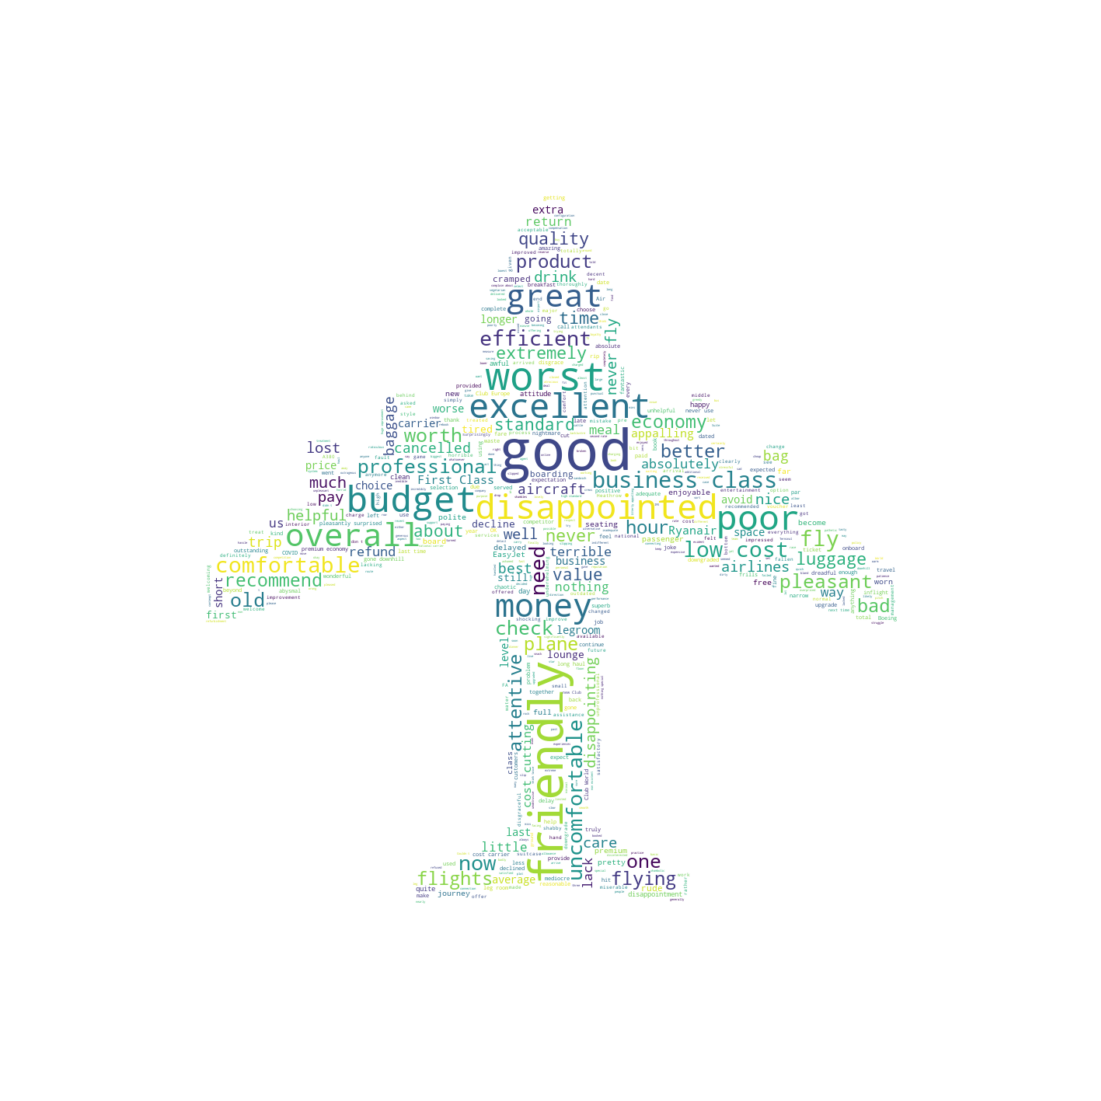

In [20]:
plt.figure(figsize=(40,20))
wc = WordCloud(stopwords=STOPWORDS_extra,
               background_color="white", max_words=2000, mask=mask)
wc.generate(content_review)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### 2-Opinion Analysis : Based on the Ratings


In [21]:
positive_reviews=''
negative_reviews=''

In [22]:
positive=df[df['Rating']>5]
negative=df[df['Rating']<5]
neutral=df[df['Rating']==5]

In [23]:
positive_reviews=sentence(list(positive['reviews']))
negative_reviews=sentence(list(negative['reviews']))

In [24]:
#positivie_reviews
mask_like= np.array(Image.open("Downloads\likeee.jpg"))
mask_color=np.array(Image.open('Downloads\green.jpg'))

In [25]:
image_colors=ImageColorGenerator(mask_color)
wc2=WordCloud(stopwords=STOPWORDS,mask=mask_like,background_color="white",color_func=image_colors,width=20)

In [26]:
wc2.generate(positive_reviews)

In [27]:
#negative_reviews
mask_dislike= np.array(Image.open("Downloads\dislike_2.jpg"))


In [28]:
mask_dislike_color= np.array(Image.open("Downloads\color.jpg"))

In [29]:
image_colour2=ImageColorGenerator(mask_dislike_color)

In [30]:
wc3=WordCloud(stopwords=STOPWORDS,mask=mask_dislike,background_color="white",width=20,color_func=image_colour2)
wc3.generate(negative_reviews)

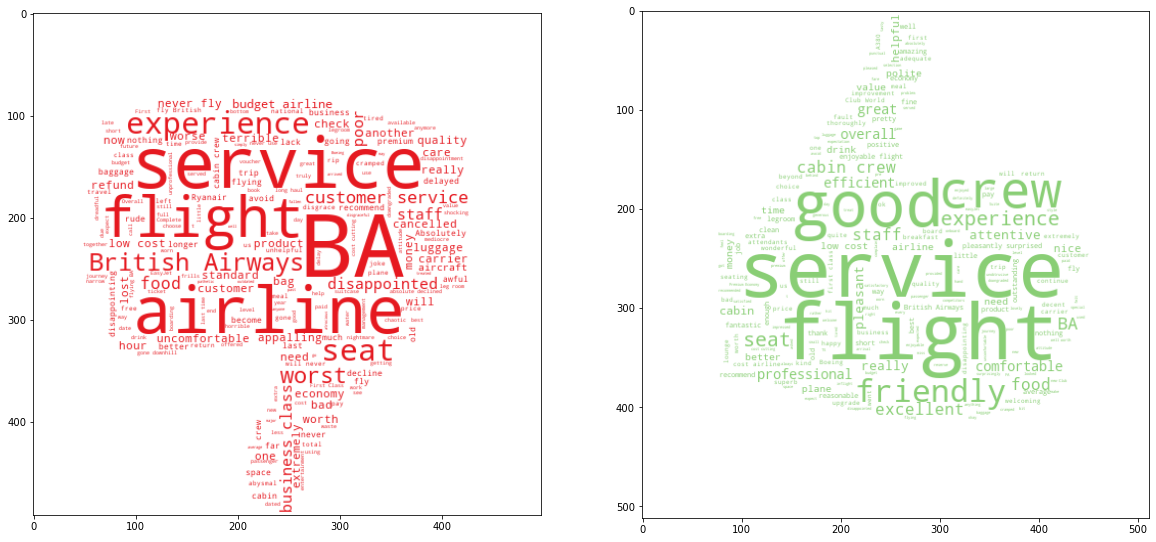

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(wc3, interpolation='bilinear')
axs[1].imshow(wc2, interpolation='bilinear')


### Top negative Reviews 

In [32]:
negative.sort_values(by='Rating').head(10)

,reviews,Rating,publish_year
661,"""delayed for 5 hours""",1,2019
1688,"""a cheap airline that cannot be relied on""",1,2016
825,"""experience was bad""",1,2018
1680,"""surly and generally unhelpful""",1,2016
1676,"""contempt for its customers""",1,2016
1675,"""give this rotten airline 0/10""",1,2016
832,"""unbelievably rude and unhelpful""",1,2018
833,"""5 mins too late for me to check in""",1,2018
1672,"""no customer loyalty sought""",1,2016
837,"""won’t be flying again""",1,2018


### Top Positive Reviews 

In [33]:
positive.sort_values(by='Rating',ascending=False).head(10)

,reviews,Rating,publish_year
2507,"""cannot fault the service""",10,2015
1937,"""no one climbing over you""",10,2016
390,"""thank you for your service and kindness""",10,2020
1928,"""cannot fault the airline""",10,2016
1913,"""superb service was provided""",10,2016
1911,"""very friendly staff""",10,2016
672,"""Flight was good""",10,2019
1888,"""breakfast was very tasty""",10,2016
1217,"""Crew were good""",10,2017
663,"""staff were absolutely delightful""",10,2019


### Top Neutral Reviews

In [34]:
neutral.sort_values(by='Rating',ascending=False).head(10)

,reviews,Rating,publish_year
11,"""just an average airline""",5,2023
1739,"""staff service completely forgettable""",5,2016
1816,"""the lowering of standards""",5,2016
1822,"""it was like being in a time warp""",5,2016
1828,"""luggage misplaced in the plane""",5,2016
1836,"""trading on previous good reputation""",5,2016
1837,"""expectations low and still disappointed""",5,2016
1842,"""feel of a budget carrier""",5,2016
1850,"""race to complete dinner service """,5,2016
1865,"""more uncomfortable than many airlines""",5,2016


>>From the previous analysis we did, we can notice some frequent common words which are: service, seat, crew, experience, staff, food,hour... These are mainly the important factors that are responsible for the customer's feeling, either positive or negative.

### Negative, Positive,Neutral Reviews Percentage

In [35]:
print(positive.count())

reviews         933
Rating          933
publish_year    933
dtype: int64


In [36]:
print(negative.count())

reviews         1410
Rating          1410
publish_year    1410
dtype: int64


In [37]:
print(neutral.count())

reviews         165
Rating          165
publish_year    165
dtype: int64


>##### 6% neutral reviews ,37% positive ,56% negative

# V-Sentiment analysis: Prediction

### Opinion Analysis : Based on the TextBlob pretrained model

In [38]:
List=[]

In [39]:
for i in range(0,len(df)):
    if df['Rating'][i]>5:
        x="pos"
        List.append((df['reviews'][i],x))
    else:
        y="neg"
        List.append((df['reviews'][i],y))

In [40]:
test=[]
train=[]

In [41]:
train,test=train_test_split(List,test_size=0.2)

In [42]:
model = NaiveBayesClassifier(train)

In [43]:
print(model.classify("5 mins too late for me to check in"))
print(model.classify("nice crew and good food"))

neg
pos


In [44]:
print(model.accuracy(test))

0.8087649402390438


### Positive and Negative reviews percentage

In [45]:
pos=count(train)+count(test)

In [46]:
print(pos)

1484


>>According to the predictive model we have 59% positive and 41% negative reviews.

# VI-Conclusion

Based on the results, we gained insights into customers' experiences with British Airways and we became aware of the key factors that influence their feelings towards the airline.
We noticed that there is a noticeable difference between the opinion analysis result based on the predictive model and the one based on the ratings so there might be two interpretations:
we can consider the neutral reviews in the previous analysis as positive or, it can be interpreted that there is a community trying to damage the e-reputation of BA by giving a low rating compared to their reviews.